<h1 align = center> CS110 - Project 3 - Final Computational Application </h1>

---
<h2 align = center>Find plagiarism with Counting Bloom Filters (CBFs) </h2>

---
<h3 align = center> Prof. R. Shekhar </h3>
<h3 align = center> 13/12/2023 </h3>

---

### CBFs IMPLEMENTATION

In [76]:
#Q3 IMPLEMENTATION OF CBFs
import random
random.seed(10)
import math
class CountingBloomFilter:
    """
    A Counting Bloom Filter implementation that supports insertion, deletion, 
    and membership query of elements.

    Attributes
    ----------
    fpr : float
        The desired false positive rate (between 0 and 1).
    num_item : int
        The expected number of items to be stored in the bloom filter.
    memory_size : int
        The size of the bloom filter's internal array, calculated 
        based on the desired false positive rate
        and the expected number of items.
    num_hashfn : int
        The number of hash functions to be used, calculated based on 
        the memory size and the number of items.
    array : list
        The internal array of the bloom filter where each index represents a counter.
    """

    def __init__(self, fpr, num_item):
        """
        Initialize the Counting Bloom Filter with a desired false 
        positive rate and expected number of items.

        Parameters
        ----------
        fpr : float
            The desired false positive rate (between 0 and 1).
        num_item : int
            The expected number of items to be stored in the bloom filter.
        """
        
        self.fpr = fpr
        self.num_item = num_item
        
        # Calculate the size of the array needed to achieve the desired false positive rate.
        self.memory_size = math.ceil(-(num_item * math.log(fpr)) / (math.log(2) ** 2))
        
        # Calculate the optimal number of hash functions based on the size of the array 
        #and the expected number of items.
        self.num_hashfn = math.ceil((self.memory_size / num_item) * math.log(2))
        
        # Initialize the internal array of the bloom filter with counters set to 0.
        self.array = [0] * self.memory_size

    def search(self, item):
        """
        Search for an item in the Counting Bloom Filter.

        Parameters
        ----------
        item : str
            The item to search for.

        Returns
        -------
        bool
            True if the item might be in the filter, False if 
            the item is definitely not in the filter.
        """
        hash_values = self.hash_cbf(item)
        return all(self.array[hash_value] > 0 for hash_value in hash_values)

    def insert(self, item):
        """
        Insert an item into the Counting Bloom Filter.

        Parameters
        ----------
        item : str
            The item to insert.
        """
        hash_values = self.hash_cbf(item)
        for hash_value in hash_values:
            self.array[hash_value] += 1

    def delete(self, item):
        """
        Remove an item from the Counting Bloom Filter, if it exists.

        Parameters
        ----------
        item : str
            The item to remove.
        """
        if self.search(item):
            hash_values = self.hash_cbf(item)
            for hash_value in hash_values:
                if self.array[hash_value] > 0:  # Ensure not to go below zero
                    self.array[hash_value] -= 1
        else:
            print(f"{item} does not exist in the CBF")

    def convert_to_int(self, string):
        """
        Generate a integer for a given string using ord() 

        Parameters
        ----------
        string : str
            The string to convert to integer.

        Returns
        -------
        int
            The integer value of the string.
        """
        int_value = 211  # Prime number seed for reduced collision probability
        
        for i in range(len(string)):
            char = ord(string[i])
            int_value = int_value*char
            
        return int_value

    def hash_cbf(self, item):
        """
        Compute a series of hash values for an item using a base hash function.

        Parameters
        ----------
        item : str
            The item to hash.

        Returns
        -------
        list
            A list of hash values for the given item.
        """
        hash_values = []
        for i in range(self.num_hashfn):
            
            # Double hashing: combine the base hash with a shifted version multiplied by the index
            hash_value = (self.convert_to_int(item) + i * \
                          (self.convert_to_int(item) << 5)) % self.memory_size
            hash_values.append(hash_value)
            
        return hash_values

### Function to convert url text file into list of words

In [77]:
#Note: This is the code from the assignement instructions
from requests import get
def get_txt_into_list_of_words(url):
    '''Cleans the text data
    Input
    ----------
    url : string
    The URL for the txt file.
    Returns
    -------
    data_just_words_lower_case: list
    List of "cleaned-up" words sorted by the order they appear in the original file.
    '''
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', '(', ')', '*']
    data = get(url).text
    data = ''.join(c for c in data if c not in bad_chars)
    data_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in data)
    data_just_words = [word for word in data_without_newlines.split(" ") if word != ""]
    data_just_words_lower_case = [word.lower() for word in data_just_words]
    return data_just_words_lower_case

### Testing Uniform distribution of the hash functions

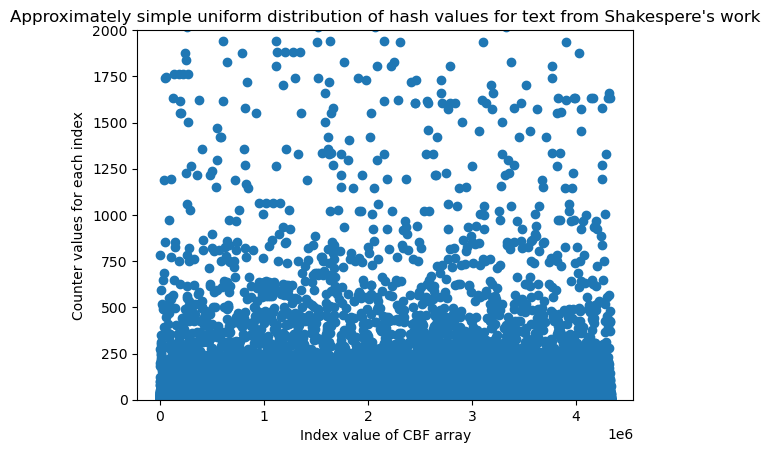

In [86]:
#Q3(A.) Uniform distribution of the hash function
import matplotlib.pyplot as plt
import math
import random
random.seed(10)
def plot_cbf_distribution(url):
    """
    Visualize the distribution of hash values in a Counting Bloom Filter (CBF) 
    after inserting elements from a text file.

    This function takes a URL pointing to a text file, processes the text 
    into a list of words, and then inserts these words into a CBF. It plots 
    the distribution of the internal counters of the CBF, giving a visual representation 
    of how uniformly the hash function distributes the elements across the array.

    Parameters
    ----------
    url : str
        URL of the text file from which words are read and inserted into 
        the CBF. The text file should contain a large body of text for a meaningful 
        distribution visualization.

    Notes
    -----
    - The function assumes the presence of a `get_txt_into_list_of_words` 
    function that takes a URL and returns a list of words from the text file.
    - The CBF is initialized with a pre-defined false positive rate and 
    size based on the length of the word list.
    - The `plt.ylim` is set to (0, 2000) for visualization purposes and 
    might need adjustment based on the actual range of counter values.

    """
   
    data = get_txt_into_list_of_words(url)
    cbf = CountingBloomFilter(0.1,len(data))
    
    previous_cbf = None
    for i in range(len(data)):
        previous_cbf = cbf.insert(data[i])
            
    plt.plot(list(range(cbf.memory_size)),cbf.array,'o')
    plt.xlabel("Index value of CBF array")
    plt.ylabel("Counter values for each index")
    plt.ylim(0,2000)
    plt.title("Approximately simple uniform distribution of hash values for text from Shakespere's work")
    plt.show()
    
url = ("https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefd"\
       +"c684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/")    
plot_cbf_distribution(url)

### TESTING THE CBF IMPLEMENTATION

In [79]:
#Q3(C.) TESTING THE CBF IMPLEMENTATION
random.seed(10)
cbf = CountingBloomFilter(fpr = 0.01, num_item = 3)

# Test 1: Checks Insertion and Deletion Functionality
L1 = ["Mango","Orange","Banana"]

for i in L1:
    cbf.insert(i)

for i in L1:
    cbf.delete(i)
    cbf
    
for i in L1:
    assert cbf.search(i) == False
print("All assertions were passed for Test case 1")


# Test 2: Checks Deletion Functionality
L2 = ["Big","Medium","Small"]

for i in L2:
    cbf.insert(i)

for i in L2:
    cbf.delete(i)
    
for i in L2:
    cbf.delete(i)
    
    
# Test 3:  Checks Insertion and Search Functionality
L1 = ["CS","NS","BS"]

for i in L1:
    cbf.insert(i)
    
for i in L1:
    assert cbf.search(i) == True
    
assert cbf.search("AH") == False

print("All assertions were passed for Test case 3")

All assertions were passed for Test case 1
Big does not exist in the CBF
Medium does not exist in the CBF
Small does not exist in the CBF
All assertions were passed for Test case 3


### VERIFYING THE EFFECTIVENESS OF THE CBF 

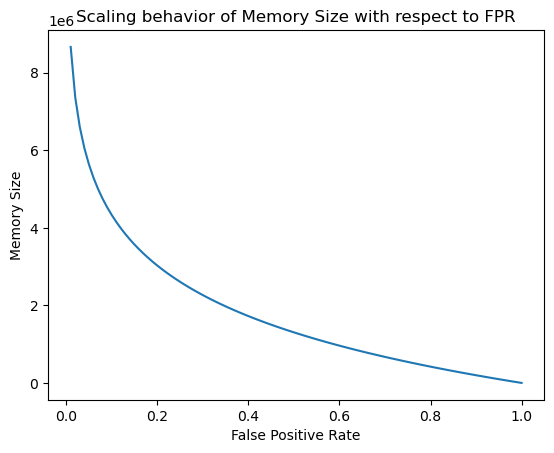

In [65]:
#Q4(a)
random.seed(10)
#shakespere text
all_text = get_txt_into_list_of_words(url)

def plot_memory_vs_fpr(data):
    """
    Plot the scaling behavior of memory size with respect to the false positive rate (FPR) 
    for a Counting Bloom Filter.

    This function creates a series of Counting Bloom Filters with varying FPRs and 
    a fixed number of items. It then plots the memory size of each filter against its FPR.

    Parameters
    ----------
    data : list
        The list of items to be inserted into the Counting Bloom Filter. 
        The length of this list determines the number of items in each filter.
    """
    fpr = []  # List to store false positive rates
    m_size = []  # List to store memory sizes corresponding to each FPR
    num_item = len(data)  # Number of items to insert into the filter

    # Loop to create Counting Bloom Filters with varying FPRs and record their memory sizes
    for i in range(1, 101):
        fpr_value = i / 100  # Calculate the false positive rate
        cbf = CountingBloomFilter(fpr=fpr_value, num_item=num_item)  # Create a CBF with the given FPR
        fpr.append(float(fpr_value))  # Append the FPR to the list
        m_size.append(cbf.memory_size)  # Append the memory size to the list

    # Plotting the results
    plt.plot(fpr, m_size)
    plt.title('Scaling behavior of Memory Size with respect to FPR')
    plt.xlabel('False Positive Rate')
    plt.ylabel('Memory Size')
    plt.show()

plot_memory_vs_fpr(all_text)  

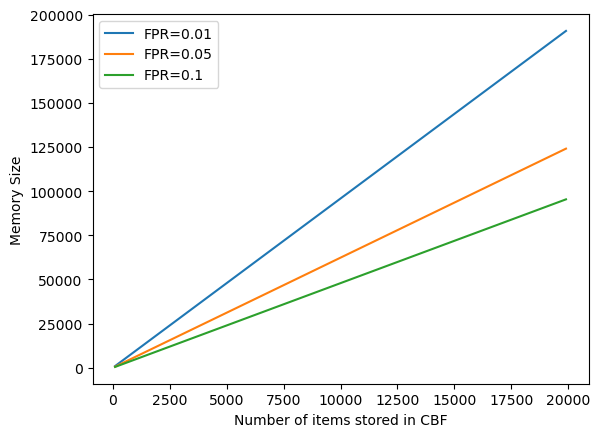

In [66]:
#Q4(b)
random.seed(10)
def plot_memory_vs_num_items(fpr_list):
    """
    Plot the scaling behavior of the memory size of a Counting Bloom Filter with 
    respect to the number of items stored,
    for different false positive rates (FPRs).

    This function generates Counting Bloom Filters for a range of numbers
    of items at each specified FPR. It then plots the memory size required for 
    each Bloom Filter against the number of items for each FPR.

    Parameters
    ----------
    fpr_list : list
        A list of false positive rates (FPRs) to test. Each FPR will be represented 
        as a separate line in the plot.
    """
    for fpr in fpr_list:
        m_size = []  # List to store memory sizes for each number of items
        num_items = []  # List to store different numbers of items

        # Loop over a range of numbers of items
        for n in range(100, 20000, 100):
            num_items.append(n)  # Append the number of items
            cbf = CountingBloomFilter(fpr, num_item=n)  # Create a CBF with 
            #the current number of items and FPR
            m_size.append(cbf.memory_size)  # Append the memory size of the CBF

        # Plot memory size against number of items for the current FPR
        plt.plot(num_items, m_size, label=f'FPR={round(fpr, 3)}')

    # Add labels, legend, and show the plot
    plt.xlabel('Number of items stored in CBF')
    plt.ylabel('Memory Size')
    plt.legend()
    plt.show()

# Example usage
plot_memory_vs_num_items([0.01, 0.05, 0.1])


In [67]:
#Q4(C) SUBCLASS OF CBF TO BE USED FOR Q4(C)
import math
random.seed(10)
class CBF2:
    """
    A Counting Bloom Filter implementation that supports insertion, deletion, 
    and membership queries for elements. This variant of Bloom Filter uses a counter 
    for each position in the internal array to allow deletion of items.

    Attributes
    ----------
    num_item : int
        The number of items expected to be stored in the bloom filter.
    memory_size : int
        The size of the bloom filter's internal array, indicating the total number of counters.
    num_hashfn : int
        The number of hash functions to be used in the bloom filter.
    array : list
        The internal array of the bloom filter where each index represents a counter.
    """

    def __init__(self, num_item, num_hashfn, memory_size):
        """
        Initialize the Counting Bloom Filter with specified parameters.

        Parameters
        ----------
        num_item : int
            The expected number of items to be stored in the bloom filter.
        num_hashfn : int
            The number of hash functions to be used for the bloom filter.
        memory_size : int
            The size of the bloom filter's internal array (number of counters).
        """
        
        self.num_item = num_item
        self.num_hashfn = num_hashfn
        self.memory_size = memory_size
        self.array = [0] * self.memory_size

    def search(self, item):
        """
        Search for an item in the Counting Bloom Filter.

        Parameters
        ----------
        item : str
            The item to search for.

        Returns
        -------
        bool
            True if the item might be in the filter, False if the item is definitely not in the filter.
        """
        hash_values = self.hash_cbf(item)
        return all(self.array[hash_value] > 0 for hash_value in hash_values)

    def insert(self, item):
        """
        Insert an item into the Counting Bloom Filter.

        Parameters
        ----------
        item : str
            The item to insert.
        """
        hash_values = self.hash_cbf(item)
        for hash_value in hash_values:
            self.array[hash_value] += 1

    def delete(self, item):
        """
        Remove an item from the Counting Bloom Filter, if it exists.

        Parameters
        ----------
        item : str
            The item to remove.
        """
        if self.search(item):
            hash_values = self.hash_cbf(item)
            for hash_value in hash_values:
                if self.array[hash_value] > 0:  # Ensure not to go below zero
                    self.array[hash_value] -= 1
        else:
            print(f"{item} does not exist in the CBF")

    def hashfn(self, string):
        """
        Generate a hash for a given string.

        Parameters
        ----------
        string : str
            The string to hash.

        Returns
        -------
        int
            The hash value of the string.
        """
        hash = 9973  # Prime number seed for reduced collision probability
        for i in range(len(string)):
            char = ord(string[i])
            hash = ((hash << 5) + hash) + char  # Bit manipulation for hash calculation
        return hash

    def hash_cbf(self, item):
        """
        Compute a series of hash values for an item using a base hash function.

        Parameters
        ----------
        item : str
            The item to hash.

        Returns
        -------
        list
            A list of hash values for the given item.
        """
        hash_values = []
        for i in range(self.num_hashfn):
            # Double hashing: combine the base hash with a shifted version multiplied by the index
            hash_value = (self.hashfn(item) + i * (self.hashfn(item) << 5)) % self.memory_size
            hash_values.append(hash_value)
        return hash_values


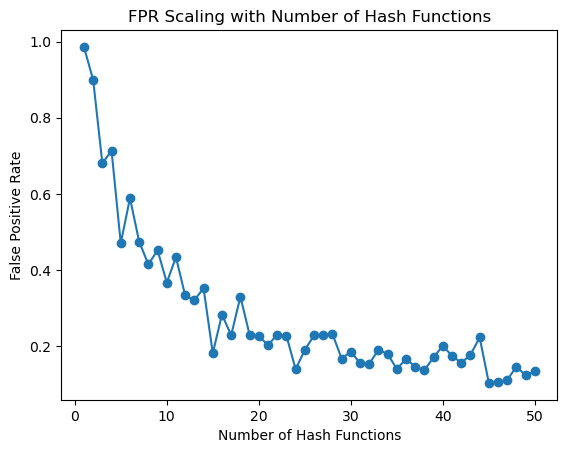

In [68]:
#Q4(c)
random.seed(10)
def measure_fpr(cbf, test_items):
    """
    Calculate the false positive rate (FPR) for a given Counting Bloom Filter.

    This function tests a set of items against the
    Bloom Filter and calculates the proportion of these items that 
    are falsely identified as being in the filter (false positives).

    Parameters
    ----------
    cbf : CountingBloomFilter
        The Counting Bloom Filter to be tested.
    test_items : list
        A list of items to test against the Bloom Filter. 
        These items should ideally not be in the filter 
        to accurately measure false positives.

    Returns
    -------
    float
        The false positive rate (FPR) calculated as the number 
        of false positives divided by the total number of test items.
    """

    false_positives = sum(1 for item in test_items if cbf.search(item))
    fpr = false_positives / len(test_items)
    return fpr

# Experiment setup and execution
num_items = len(all_text[0:2000])  # Number of items to insert
test_items = all_text[0:2000]  # Items not in the data_set

hash_functions_list = []  # List to store numbers of hash functions
fpr_list = []  # List to store corresponding false positive rates

for num_hashfn in range(1, 51):
    """
    Perform an experiment to measure how the false positive rate
    (FPR) of a Counting Bloom Filter scales with the number of hash functions.

    This loop creates Counting Bloom Filters with a varying number of hash functions. 
    Each filter is tested with a fixed set of items to measure the FPR.

    The range for the number of hash functions is set from 1 to 50.
    """

    cbf = CBF2(num_item=num_items, num_hashfn=num_hashfn, memory_size=1000*num_hashfn)
    
    for i in range(num_items):
        cbf.insert("item" + str(i))
    
    fpr = measure_fpr(cbf, test_items)
    hash_functions_list.append(num_hashfn)
    fpr_list.append(fpr)

# Plot the results
plt.plot(hash_functions_list, fpr_list, marker='o')
plt.title('FPR Scaling with Number of Hash Functions')
plt.xlabel('Number of Hash Functions')
plt.ylabel('False Positive Rate')
plt.show()


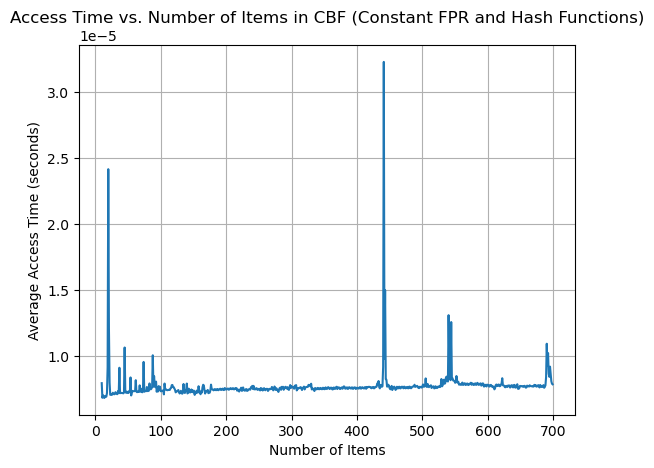

In [69]:
#Q4(d)
import random
import matplotlib.pyplot as plt
import numpy as np
import time
random.seed(10)

def access_time(num_item, fpr, num_hashfn):
    """
    Calculate the average access time for searching elements in a Counting Bloom Filter.

    Parameters
    ----------
    num_item : int
        The number of items to be stored in the CBF.
    fpr : float
        The false positive rate for the CBF.
    num_hashfn : int
        The number of hash functions used by the CBF.

    Returns
    -------
    float
        The average access time per search operation in seconds.
    """
    # Initialize CBF with a constant number of hash functions
    cbf = CountingBloomFilter(fpr=fpr, num_item=num_item)

    # Insert items into the CBF
    for i in range(num_item):
        cbf.insert(f"item{i}")

    # Time the search operations
    start_time = time.time()
    for i in range(num_item):
        cbf.search(f"item{i}")
    end_time = time.time()

    # Calculate the average access time per search operation
    total_time = end_time - start_time
    average_time = total_time / num_item
    return average_time

# Experiment setup
fpr = 0.1  # Example false positive rate
num_hashfn = 5  # Constant number of hash functions
num_items_list = np.arange(10, 700, 1)  # Varying number of items
access_times = []

# Measure the access time for different numbers of items
for num_items in num_items_list:
    time_taken = access_time(num_items, fpr, num_hashfn)
    access_times.append(time_taken)

# Plot the results
plt.plot(num_items_list, access_times)
plt.title('Access Time vs. Number of Items in CBF (Constant FPR and Hash Functions)')
plt.xlabel('Number of Items')
plt.ylabel('Average Access Time (seconds)')
plt.grid(True)
plt.show()

### DATA FOR PLAGIARISM DEDECTOR

In [20]:
#Q5
#data to test for plagiarism detector
url_version_1 = 'https://bit.ly/39MurYb'
url_version_2 = 'https://bit.ly/3we1QCp'
url_version_3 = 'https://bit.ly/3vUecRn'

version_1 = get_txt_into_list_of_words(url_version_1)
version_2 = get_txt_into_list_of_words(url_version_2)
version_3 = get_txt_into_list_of_words(url_version_3)

In [53]:
def detect_plagiarism(text_a, text_b, phrase_size, fpr):
    """
    Detects the extent of plagiarism between two texts using a 
    Counting Bloom Filter.

    This function inserts phrases from the first text into a 
    Counting Bloom Filter and then checks
    each phrase from the second text against the filter to 
    determine if it might be plagiarized.

    Parameters
    ----------
    text_a : str
        The source text where phrases will be inserted into the Counting Bloom Filter.
    text_b : str
        The text to check for plagiarism against the source text.
    phrase_size : int
        The number of consecutive words in a phrase for plagiarism checking.
    fpr : float
        The desired false positive rate for the Counting Bloom Filter.

    Returns
    -------
    float
        The ratio of phrases in the second text that were found 
        in the Counting Bloom Filter, representing
        the extent of plagiarism.
    """    

    # Tokenize both texts into phrases of specific phrase size
    phrases_a = [' '.join(text_a[i:i+phrase_size]) for i in range(len(text_a) - phrase_size + 1)]
    phrases_b = [' '.join(text_b[i:i+phrase_size]) for i in range(len(text_b) - phrase_size + 1)]

    # Initialize the Counting Bloom Filter with text A's phrases
    cbf = CountingBloomFilter(fpr=fpr, num_item=len(phrases_a))
    for phrase in phrases_a:
        cbf.insert(phrase)

    # Check for plagiarism by searching for text B's phrases in the filter
    plagiarism_count = 0
    for phrase in phrases_b:
        if cbf.search(phrase):
            plagiarism_count += 1

    # Calculate the extent of plagiarism
    extent_of_plagiarism = plagiarism_count / len(phrases_b)
    return extent_of_plagiarism*100


In [54]:
# Define the texts and parameters
text_version_1 = version_1  # Replace with the actual text content
text_version_2 = version_2  # Replace with the actual text content
text_version_3 = version_3   # Replace with the actual text content
phrase_size = 5  # The size of the phrase to check for plagiarism
fpr = 0.01  # The desired false positive rate

plagiarism_1_1 = detect_plagiarism(text_version_1, text_version_1, phrase_size, fpr)
plagiarism_1_2 = detect_plagiarism(text_version_1, text_version_2, phrase_size, fpr)
plagiarism_1_3 = detect_plagiarism(text_version_1, text_version_3, phrase_size, fpr)
plagiarism_2_1 = detect_plagiarism(text_version_2, text_version_1, phrase_size, fpr)
plagiarism_2_2 = detect_plagiarism(text_version_2, text_version_2, phrase_size, fpr)
plagiarism_2_3 = detect_plagiarism(text_version_2, text_version_3, phrase_size, fpr)
plagiarism_3_1 = detect_plagiarism(text_version_3, text_version_1, phrase_size, fpr)
plagiarism_3_2 = detect_plagiarism(text_version_3, text_version_2, phrase_size, fpr)
plagiarism_3_3 = detect_plagiarism(text_version_3, text_version_3, phrase_size, fpr)

print()
print(f"Plagiarism extent between version 1 and 1: {float(plagiarism_1_1)}%")
print(f"Plagiarism extent between version 1 and 2: {float(plagiarism_1_2)}%")
print(f"Plagiarism extent between version 1 and 3: {float(plagiarism_1_3)}%")

print()
print(f"Plagiarism extent between version 2 and 1: {float(plagiarism_2_1)}%")
print(f"Plagiarism extent between version 2 and 2: {float(plagiarism_2_2)}%")
print(f"Plagiarism extent between version 2 and 3: {float(plagiarism_2_3)}%")

print()
print(f"Plagiarism extent between version 3 and 1: {float(plagiarism_3_1)}%")
print(f"Plagiarism extent between version 3 and 2: {float(plagiarism_3_2)}%")
print(f"Plagiarism extent between version 3 and 3: {float(plagiarism_3_3)}%")


Plagiarism extent between version 1 and 1: 100.0%
Plagiarism extent between version 1 and 2: 36.99893579283434%
Plagiarism extent between version 1 and 3: 37.69590643274854%

Plagiarism extent between version 2 and 1: 37.55468842379094%
Plagiarism extent between version 2 and 2: 100.0%
Plagiarism extent between version 2 and 3: 37.859649122807014%

Plagiarism extent between version 3 and 1: 10.00354735721887%
Plagiarism extent between version 3 and 2: 10.263686886602814%
Plagiarism extent between version 3 and 3: 100.0%


### JACCARD METHOD IMPLEMENTATION

In [55]:
def jaccard_similarity_with_phrases(text_a, text_b, phrase_size):
    """
    Calculate the Jaccard Similarity between two texts, based on phrases of a specified size.

    Parameters:
    text_a (str): First text.
    text_b (str): Second text.
    phrase_size (int): The number of consecutive words in a phrase.

    Returns:
    float: Jaccard Similarity coefficient.
    """
    
    # Tokenize both texts into phrases of specific phrase size
    set1 = set([' '.join(text_a[i:i+phrase_size]) for i in range(len(text_a) - phrase_size + 1)])
    set2 = set([' '.join(text_b[i:i+phrase_size]) for i in range(len(text_b) - phrase_size + 1)])
    

    # Find the intersection and union of the two phrase sets
    intersection = set1.intersection(set2)
    union = set1.union(set2)

    # Calculate the Jaccard Similarity
    if not union:
        return 1.0  # Return 1 if both sets are empty
    
    jaccard_similarity_coefficient = float(len(intersection)) / len(union)

    return jaccard_similarity_coefficient*100

In [80]:
# Example texts
version_1_i = "This is a test text for Jaccard similarity calculation."
version_2_i = "This is a test text for Jaccard similarity calculation."  
# Identical to version_1_identical

version_1_d = "This is a test text for Jaccard similarity calculation."
version_2_d = "Completely different content with no common phrases."  
# Completely different from version_1_different

# Define the phrase size
phrase_size = 5  # You can adjust this based on your needs

# Calculate similarities
similarity_identical = jaccard_similarity_with_phrases(version_1_i.split(), \
                                                       version_2_i.split(), phrase_size)
similarity_different = jaccard_similarity_with_phrases(version_1_d.split(), \
                                                       version_2_d.split(), phrase_size)

# Assertion for identical texts
expected_similarity_identical = 100
assert similarity_identical == expected_similarity_identical, \
f"Test failed for identical texts: Expected \
{expected_similarity_identical}%, got {similarity_identical}%"

# Assertion for different texts
expected_similarity_different = 0
assert similarity_different == expected_similarity_different, \
f"Test failed for different texts: Expected \
{expected_similarity_different}%, got {similarity_different}%"

print("All tests passed!")


All tests passed!


### LIST METHOD IMPLEMENTATION

In [57]:
def list_method(text_a, text_b, phrase_size):
    """
    Defines the level of plagiarism between two texts with lists methods
    
    Input
    ----------
    text_a, text_b: list
        two texts to check level of plagiarism
    phrase_size: int
        number of words in the phrase
        
    Returns
    ----------
    None
    """
    
    phrases = []
    plagiarism = 0
    
    # Tokenize both texts into phrases of specific phrase size
    text_a = [' '.join(text_a[i:i+phrase_size]) for i in range(len(text_a) - phrase_size + 1)]
    text_b = [' '.join(text_b[i:i+phrase_size]) for i in range(len(text_b) - phrase_size + 1)]

    
    # Adding all elements to the list
    for i in range(len(text_a) - phrase_size + 1):
        phrases.append(text_a[i:i+phrase_size])
    
    # Searching if an element is in the list of text_2
    for i in range(len(text_b) - phrase_size + 1):
        if text_b[i:i+phrase_size] in phrases:
            plagiarism += 1
    
    plagiarism_level = (plagiarism / (len(text_b) - phrase_size + 1)) 
    return plagiarism_level * 100

In [58]:
# Example texts for testing
version_1_identical = "This is a test text for plagiarism detection here.".split()
version_2_identical = "This is a test text for plagiarism detection here.".split()  
# Identical to version_1_identical

version_1_different = "This is a test text for plagiarism detection here.".split()
version_2_different = "Completely different content with no common phrases here.".split()  
# Completely different from version_1_different

# Define the phrase size for testing
phrase_size = 4  # Adjust this as needed

# Calculate plagiarism levels
plagiarism_level_identical = list_method(version_1_identical, version_2_identical, phrase_size)
plagiarism_level_different = list_method(version_1_different, version_2_different, phrase_size)

# Assertion for identical texts
expected_plagiarism_identical = 100
assert plagiarism_level_identical == expected_plagiarism_identical, \
f"Test failed for identical texts: Expected \
{expected_plagiarism_identical}%, got {plagiarism_level_identical}%"

# Assertion for different texts
expected_plagiarism_different = 0
assert plagiarism_level_different == expected_plagiarism_different, \
f"Test failed for different texts: Expected \
{expected_plagiarism_different}%, got {plagiarism_level_different}%"

print("All tests passed!")


All tests passed!


In [59]:
#Q5
#data to test for plagiarism detector
url_version_1 = 'https://bit.ly/39MurYb'
url_version_2 = 'https://bit.ly/3we1QCp'
url_version_3 = 'https://bit.ly/3vUecRn'

version_1 = get_txt_into_list_of_words(url_version_1)
version_2 = get_txt_into_list_of_words(url_version_2)
version_3 = get_txt_into_list_of_words(url_version_3)

### TIME COMPLEXITY PLOTS

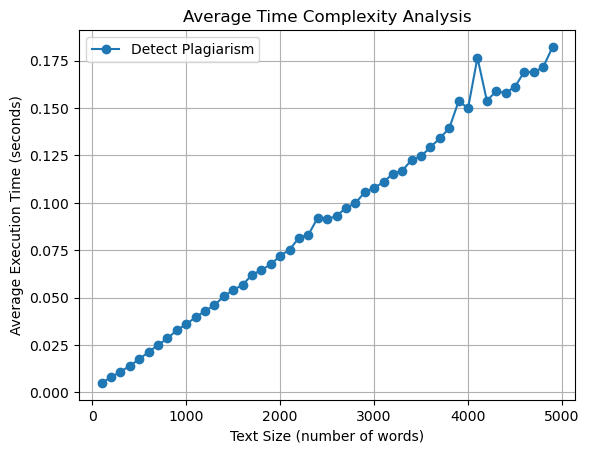

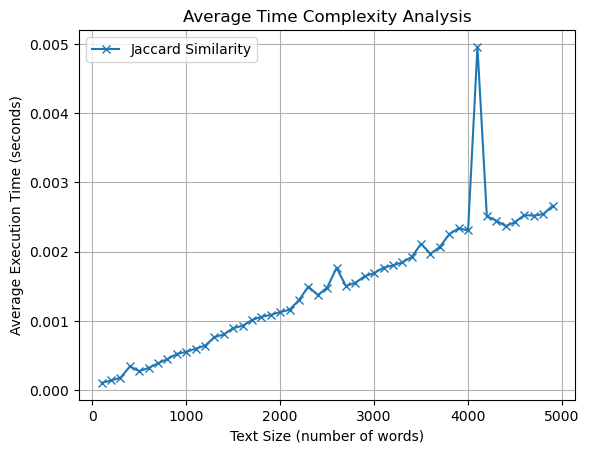

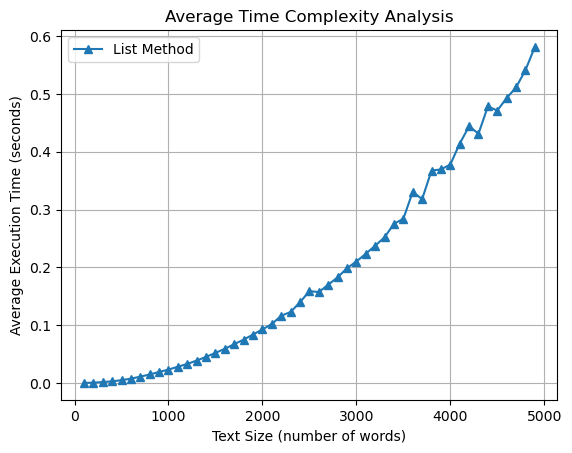

In [75]:
# We already have the functions defined in the previous cells, 
#so now we will proceed with the analysis.
# First, we need to define a function to measure the execution
#time of another function.

import time
import random
random.seed(10)
import string
import matplotlib.pyplot as plt


# Define the function to generate random text of given size
def generate_text(size):
    """
    Generate a random text of a given size.

    This function creates a list of random lowercase letters of the specified length.

    Parameters
    ----------
    size : int
        The number of characters in the generated text.

    Returns
    -------
    list
        A list of random lowercase letters of length 'size'.
    """
    return [random.choice(string.ascii_lowercase) for _ in range(size)]

# Define a function to measure the execution time of a function
def measure_execution_time(func, *args):
    """
    Measure the execution time of a specified function.

    This function times how long it takes for a given function to 
    execute and returns the execution time.

    Parameters
    ----------
    func : function
        The function to measure the execution time of.
    *args
        Arguments to be passed to the function being measured.

    Returns
    -------
    float
        The time taken to execute the function in seconds.
    result
        The return value of the function being measured.
    """
    start_time = time.time()
    result = func(*args)
    execution_time = time.time() - start_time
    return execution_time, result

# Now let's perform the time complexity analysis for each method
# Define text sizes for the analysis
text_sizes = [i for i in range(100, 5000, 100)]
phrase_size = 6
fpr = 0.01

# Lists to hold execution times for each algorithm
times_detect_plagiarism = []
times_jaccard_similarity = []
times_list_method = []

# Perform analysis
for size in text_sizes:
    # Initialize accumulators for average calculation
    total_time_plagiarism = 0
    total_time_jaccard = 0
    total_time_list_method = 0
    
    # Define number of runs to calculate average runtime
    num_runs = 5
    
    for _ in range(num_runs):
        text_1 = generate_text(size)
        text_2 = generate_text(size)
        
        # Time the detect_plagiarism function
        exec_time, _ = measure_execution_time(detect_plagiarism, \
                                              text_1, text_2, phrase_size, fpr)
        total_time_plagiarism += exec_time
        
        # Time the jaccard_similarity_with_phrases function
        exec_time, _ = measure_execution_time(jaccard_similarity_with_phrases, \
                                              text_1, text_2, phrase_size)
        total_time_jaccard += exec_time
        
        # Time the list_method function
        exec_time, _ = measure_execution_time(list_method, text_1, text_2, phrase_size)
        total_time_list_method += exec_time
    
    # Calculate the average time
    avg_time_plagiarism = total_time_plagiarism / num_runs
    avg_time_jaccard = total_time_jaccard / num_runs
    avg_time_list_method = total_time_list_method / num_runs
    
    # Append the average times to the lists
    times_detect_plagiarism.append(avg_time_plagiarism)
    times_jaccard_similarity.append(avg_time_jaccard)
    times_list_method.append(avg_time_list_method)


plt.plot(text_sizes, times_detect_plagiarism, label='Detect Plagiarism', marker='o')
plt.xlabel('Text Size (number of words)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Time Complexity Analysis')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(text_sizes, times_jaccard_similarity, label='Jaccard Similarity', marker='x')
plt.xlabel('Text Size (number of words)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Time Complexity Analysis')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(text_sizes, times_list_method, label='List Method', marker='^')
plt.xlabel('Text Size (number of words)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Time Complexity Analysis')
plt.legend()
plt.grid(True)
plt.show()

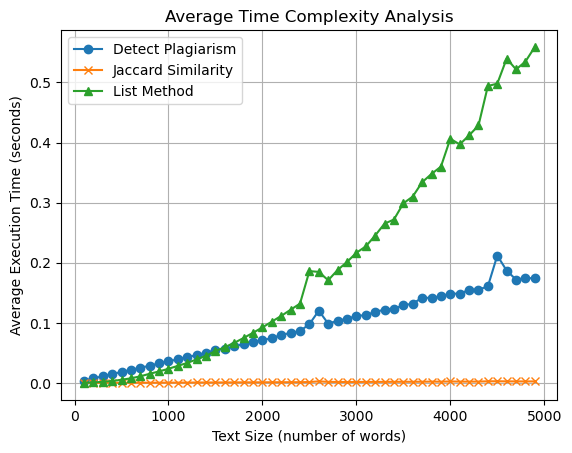

In [73]:
plt.plot(text_sizes, times_detect_plagiarism, label='Detect Plagiarism', marker='o')
plt.plot(text_sizes, times_jaccard_similarity, label='Jaccard Similarity', marker='x')
plt.plot(text_sizes, times_list_method, label='List Method', marker='^')
plt.xlabel('Text Size (number of words)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Time Complexity Analysis')
plt.legend()
plt.grid(True)
plt.show()